In [1]:
import os
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm, tnrange
from sklearn import metrics
from IPython.display import Image 
from sklearn.cross_validation import train_test_split


/Users/ivan/Desktop/ALL/Soft/python3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


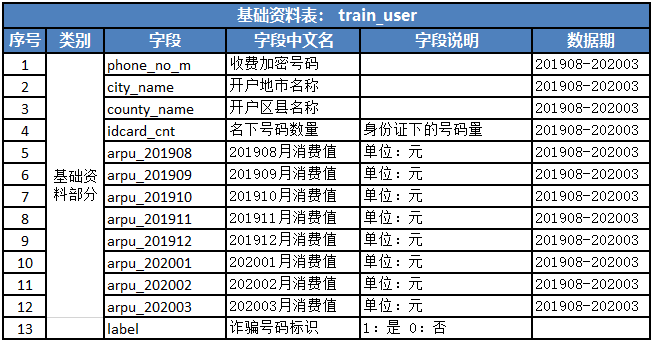

In [2]:
Image('img/1.png')  

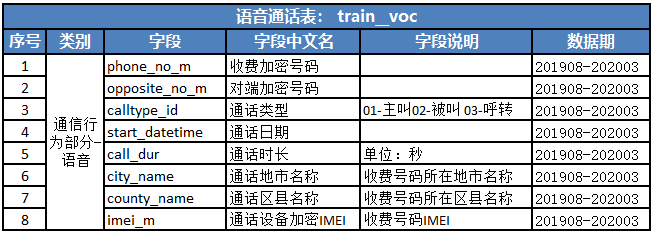

In [3]:
Image('img/2.png')

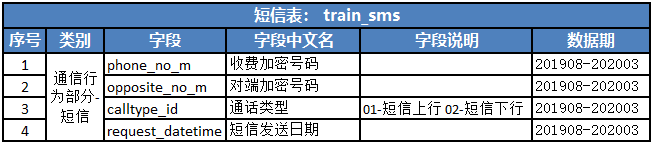

In [4]:
Image('img/3.png')

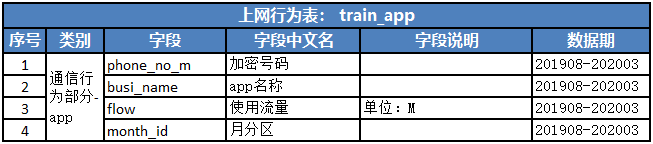

In [5]:
Image('img/4.png')

In [6]:
dt = "/Users/ivan/Desktop/ALL/Data/SCAutiFraud/0527/"

In [7]:
! ls -l "/Users/ivan/Desktop/ALL/Data/SCAutiFraud/0527/"

total 1168
-rwxr-xr-x@ 1 ivan  staff  267912  5 26 22:33 submit_example.csv
-rwxr-xr-x@ 1 ivan  staff  267912  6  7 13:22 submit_example0.csv
drwxr-xr-x@ 6 ivan  staff     192  5 25 16:41 test
drwxr-xr-x@ 6 ivan  staff     192  5 26 09:28 train


### 2020-04

In [8]:
mth = '2020-04'
month = mth.replace("-", "")

In [9]:
%time user = pd.read_csv(f"{dt}/test/test_user.csv")
user.fillna(-1, inplace=True)
user

CPU times: user 11.9 ms, sys: 4.35 ms, total: 16.2 ms
Wall time: 15.3 ms


,phone_no_m,city_name,county_name,idcard_cnt,arpu_202004
0,22d522340df77e2252c1a4d92b4bcb00d515e36f3ec6bf...,成都,金牛分公司,1,9.00
1,5220d4b8429bdba3971a7b46a088c6b8fa6710f4060759...,天府新区,天府直属部门,1,-1.00
2,7d19dd2b50ced56f03d23bf928cf34dc570a48525571a8...,成都,锦江分公司,1,9.00
3,134a4a591185c9d3788021896dcfc235e9e0a6a1e3f8a4...,绵阳,江油分公司,1,138.70
4,2356dcd6759d50455ddaeed03c838843558e9182d5962f...,成都,青羊分公司,2,39.00
5,4ea585532dd16a41b42f814c5ed2d18e93d07b2d76d770...,成都,高新分公司,1,9.80
6,bd954fbc4a32ee202578d24c1af2df9e1db740912cead0...,绵阳,游仙分公司,1,20.10
7,ba64696f2808101fe7e7f37bb50117a8a72535bd516c92...,成都,武侯分公司,3,-1.00
8,6562edeaa63dcd67825cdb18e0d4f3e9eaa07fce0edcdf...,-1,-1,1,76.04
9,32dee85edbe2423cf1f265133ae00fb833622bc59b7f05...,自贡,荣县分公司,2,101.90


In [10]:
user["v001"] = user["idcard_cnt"].apply(lambda x: 1 if x >= 3 or x == 0 else 0)
user["v002"] = user["city_name"].apply(lambda x: 1 if x == -1 else 0)

# NEW.
user["v003"] = user[f"arpu_{month}"].apply(lambda x: 1 if x == -1 else 0)
# NEW.

user[["phone_no_m", "v001", "v002", "v003"]].head(10)


,phone_no_m,v001,v002,v003
0,22d522340df77e2252c1a4d92b4bcb00d515e36f3ec6bf...,0,0,0
1,5220d4b8429bdba3971a7b46a088c6b8fa6710f4060759...,0,0,1
2,7d19dd2b50ced56f03d23bf928cf34dc570a48525571a8...,0,0,0
3,134a4a591185c9d3788021896dcfc235e9e0a6a1e3f8a4...,0,0,0
4,2356dcd6759d50455ddaeed03c838843558e9182d5962f...,0,0,0
5,4ea585532dd16a41b42f814c5ed2d18e93d07b2d76d770...,0,0,0
6,bd954fbc4a32ee202578d24c1af2df9e1db740912cead0...,0,0,0
7,ba64696f2808101fe7e7f37bb50117a8a72535bd516c92...,1,0,1
8,6562edeaa63dcd67825cdb18e0d4f3e9eaa07fce0edcdf...,0,1,0
9,32dee85edbe2423cf1f265133ae00fb833622bc59b7f05...,0,0,0


---

In [11]:
%time voc = pd.read_csv(f"{dt}/test/test_voc.csv", nrows=5)
voc

CPU times: user 3.05 ms, sys: 2.03 ms, total: 5.08 ms
Wall time: 3.6 ms


,phone_no_m,opposite_no_m,calltype_id,start_datetime,call_dur,city_name,county_name,imei_m
0,b3dce36871f3e88164b18d4953b114163f008cb51c28fe...,f87f526ee776ac8b6b28392620fbb6049af9eaadab7de2...,1,2020-04-13 21:04:10,1909,NaN,NaN,685a0bfcd91b4ecec2ff35d656a35a4e4f9e1c7a92b15f...
1,b3dce36871f3e88164b18d4953b114163f008cb51c28fe...,f87f526ee776ac8b6b28392620fbb6049af9eaadab7de2...,1,2020-04-13 18:32:50,2510,NaN,NaN,685a0bfcd91b4ecec2ff35d656a35a4e4f9e1c7a92b15f...
2,b3dce36871f3e88164b18d4953b114163f008cb51c28fe...,f87f526ee776ac8b6b28392620fbb6049af9eaadab7de2...,1,2020-04-13 19:55:12,25,NaN,NaN,685a0bfcd91b4ecec2ff35d656a35a4e4f9e1c7a92b15f...
3,7ec68a368fbbec3279a6a34847f7959623dbff4638351a...,ed8280e5590e40e35a2af7d8708a0754540b0612600d52...,1,2020-04-20 14:11:44,276,NaN,NaN,a60e82a4383faa79ea972adc48686a729f689b7d1923bc...
4,7ec68a368fbbec3279a6a34847f7959623dbff4638351a...,ba792e76c3e7ee47d2403083f6def313372ae450ddf0b9...,2,2020-04-20 12:56:33,539,NaN,NaN,a60e82a4383faa79ea972adc48686a729f689b7d1923bc...


In [12]:
vocl = []

n = 0
with open(f"{dt}/test/test_voc.csv", "r") as f:
    for i in tqdm(f):
        i = i.strip("\n")
        if mth in i:
            vocl.append(i.split(","))
        
        n += 1

vocm = pd.DataFrame(vocl, columns=voc.columns)
%time vocm["start_dt"] = vocm["start_datetime"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
%time vocm["Hour"] = vocm["start_datetime"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').hour)
vocm["kcall_dur"] = vocm["call_dur"].apply(lambda x: int(x))
vocm["k"] = 1
vocm.head()


276523it [00:01, 232625.01it/s]


CPU times: user 2.39 s, sys: 19.2 ms, total: 2.41 s
Wall time: 2.42 s
CPU times: user 2.91 s, sys: 12.6 ms, total: 2.92 s
Wall time: 2.95 s


,phone_no_m,opposite_no_m,calltype_id,start_datetime,call_dur,city_name,county_name,imei_m,start_dt,Hour,kcall_dur,k
0,b3dce36871f3e88164b18d4953b114163f008cb51c28fe...,f87f526ee776ac8b6b28392620fbb6049af9eaadab7de2...,1,2020-04-13 21:04:10,1909,,,685a0bfcd91b4ecec2ff35d656a35a4e4f9e1c7a92b15f...,2020-04-13 21:04:10,21,1909,1
1,b3dce36871f3e88164b18d4953b114163f008cb51c28fe...,f87f526ee776ac8b6b28392620fbb6049af9eaadab7de2...,1,2020-04-13 18:32:50,2510,,,685a0bfcd91b4ecec2ff35d656a35a4e4f9e1c7a92b15f...,2020-04-13 18:32:50,18,2510,1
2,b3dce36871f3e88164b18d4953b114163f008cb51c28fe...,f87f526ee776ac8b6b28392620fbb6049af9eaadab7de2...,1,2020-04-13 19:55:12,25,,,685a0bfcd91b4ecec2ff35d656a35a4e4f9e1c7a92b15f...,2020-04-13 19:55:12,19,25,1
3,7ec68a368fbbec3279a6a34847f7959623dbff4638351a...,ed8280e5590e40e35a2af7d8708a0754540b0612600d52...,1,2020-04-20 14:11:44,276,,,a60e82a4383faa79ea972adc48686a729f689b7d1923bc...,2020-04-20 14:11:44,14,276,1
4,7ec68a368fbbec3279a6a34847f7959623dbff4638351a...,ba792e76c3e7ee47d2403083f6def313372ae450ddf0b9...,2,2020-04-20 12:56:33,539,,,a60e82a4383faa79ea972adc48686a729f689b7d1923bc...,2020-04-20 12:56:33,12,539,1


In [13]:
_1 = vocm[["phone_no_m", "start_dt"]].copy()
_1.sort_values(by=["phone_no_m", "start_dt"], inplace=True)
%time _1["start_dt1"] = _1[["phone_no_m", "start_dt"]].groupby("phone_no_m").shift()
%time _1["start_dtd"] = [(i-j).seconds for i, j in zip(_1["start_dt"], _1["start_dt1"])]
_1.head()

CPU times: user 125 ms, sys: 6.69 ms, total: 132 ms
Wall time: 132 ms
CPU times: user 5.11 s, sys: 28.2 ms, total: 5.14 s
Wall time: 5.15 s


,phone_no_m,start_dt,start_dt1,start_dtd
256414,000f0f3100d815774e51f504a43e636dee84449da1c2c4...,2020-04-01 08:05:48,NaT,NaN
256415,000f0f3100d815774e51f504a43e636dee84449da1c2c4...,2020-04-01 08:08:17,2020-04-01 08:05:48,149.0
256416,000f0f3100d815774e51f504a43e636dee84449da1c2c4...,2020-04-01 11:04:26,2020-04-01 08:08:17,10569.0
256827,000f0f3100d815774e51f504a43e636dee84449da1c2c4...,2020-04-01 15:25:43,2020-04-01 11:04:26,15677.0
256413,000f0f3100d815774e51f504a43e636dee84449da1c2c4...,2020-04-01 16:32:45,2020-04-01 15:25:43,4022.0


In [14]:
%time vocm0 = vocm[["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm0.reset_index(inplace=True)
vocm0.rename({"k": "v004_Ak", "kcall_dur": "v005_Acall"}, inplace=True, axis=1)
# vocm0

%time vocm1 = vocm[vocm["calltype_id"] == "1"][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm1.reset_index(inplace=True)
vocm1.rename({"k": "v006_1k", "kcall_dur": "v007_1call"}, inplace=True, axis=1)
# vocm1

%time vocm2 = vocm[vocm["calltype_id"] == "2"][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm2.reset_index(inplace=True)
vocm2.rename({"k": "v008_2k", "kcall_dur": "v009_2call"}, inplace=True, axis=1)
# vocm2

%time vocm3 = vocm[vocm["calltype_id"] == "3"][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm3.reset_index(inplace=True)
vocm3.rename({"k": "v010_3k", "kcall_dur": "v011_3call"}, inplace=True, axis=1)
# vocm3


# NEW.
%time vocm4 = vocm[vocm["Hour"].isin([0,1,2,3,4,5,6])][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm4.reset_index(inplace=True)
vocm4.rename({"k": "v062_h0006", "kcall_dur":"v063_call"}, inplace=True, axis=1)
# vocm4

%time vocm5 = vocm[vocm["Hour"].isin([7,8,9,10,11,12])][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm5.reset_index(inplace=True)
vocm5.rename({"k": "v064_h0712", "kcall_dur":"v065_call"}, inplace=True, axis=1)
# vocm5

%time vocm6 = vocm[vocm["Hour"].isin([13,14,15,16,17,18])][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm6.reset_index(inplace=True)
vocm6.rename({"k": "v066_h1318", "kcall_dur":"v067_call"}, inplace=True, axis=1)
# vocm6

%time vocm7 = vocm[vocm["Hour"].isin([19,20,21,22,23])][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm7.reset_index(inplace=True)
vocm7.rename({"k": "v068_h1923", "kcall_dur":"v069_call"}, inplace=True, axis=1)
# vocm7


%time vocm8 = vocm[(vocm["calltype_id"] == "1")&(vocm["Hour"].isin([0,1,2,3,4,5,6]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm8.reset_index(inplace=True)
vocm8.rename({"k": "v070_h0006", "kcall_dur":"v071_call"}, inplace=True, axis=1)
# vocm8

%time vocm9 = vocm[(vocm["calltype_id"] == "1")&(vocm["Hour"].isin([7,8,9,10,11,12]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocm9.reset_index(inplace=True)
vocm9.rename({"k": "v072_h0712", "kcall_dur":"v073_call"}, inplace=True, axis=1)
# vocm9

%time vocmA = vocm[(vocm["calltype_id"] == "1")&(vocm["Hour"].isin([13,14,15,16,17,18]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmA.reset_index(inplace=True)
vocmA.rename({"k": "v074_h1318", "kcall_dur":"v075_call"}, inplace=True, axis=1)
# vocmA

%time vocmB = vocm[(vocm["calltype_id"] == "1")&(vocm["Hour"].isin([19,20,21,22,23]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmB.reset_index(inplace=True)
vocmB.rename({"k": "v076_h1923", "kcall_dur":"v077_call"}, inplace=True, axis=1)
# vocmB


%time vocmC = vocm[(vocm["calltype_id"] == "2")&(vocm["Hour"].isin([0,1,2,3,4,5,6]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmC.reset_index(inplace=True)
vocmC.rename({"k": "v078_h0006", "kcall_dur":"v079_call"}, inplace=True, axis=1)
# vocmC

%time vocmD = vocm[(vocm["calltype_id"] == "2")&(vocm["Hour"].isin([7,8,9,10,11,12]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmD.reset_index(inplace=True)
vocmD.rename({"k": "v080_h0712", "kcall_dur":"v081_call"}, inplace=True, axis=1)
# vocmD

%time vocmE = vocm[(vocm["calltype_id"] == "2")&(vocm["Hour"].isin([13,14,15,16,17,18]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmE.reset_index(inplace=True)
vocmE.rename({"k": "v082_h1318", "kcall_dur":"v083_call"}, inplace=True, axis=1)
# vocmE

%time vocmF = vocm[(vocm["calltype_id"] == "2")&(vocm["Hour"].isin([19,20,21,22,23]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmF.reset_index(inplace=True)
vocmF.rename({"k": "v084_h1923", "kcall_dur":"v085_call"}, inplace=True, axis=1)
# vocmF


%time vocmG = vocm[(vocm["calltype_id"] == "3")&(vocm["Hour"].isin([0,1,2,3,4,5,6]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmG.reset_index(inplace=True)
vocmG.rename({"k": "v086_h0006", "kcall_dur":"v087_call"}, inplace=True, axis=1)
# vocmG

%time vocmH = vocm[(vocm["calltype_id"] == "3")&(vocm["Hour"].isin([7,8,9,10,11,12]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmH.reset_index(inplace=True)
vocmH.rename({"k": "v088_h0712", "kcall_dur":"v089_call"}, inplace=True, axis=1)
# vocmH

%time vocmI = vocm[(vocm["calltype_id"] == "3")&(vocm["Hour"].isin([13,14,15,16,17,18]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmI.reset_index(inplace=True)
vocmI.rename({"k": "v090_h1318", "kcall_dur":"v091_call"}, inplace=True, axis=1)
# vocmI

%time vocmJ = vocm[(vocm["calltype_id"] == "3")&(vocm["Hour"].isin([19,20,21,22,23]))][["phone_no_m", "k", "kcall_dur"]].groupby("phone_no_m").sum()
vocmJ.reset_index(inplace=True)
vocmJ.rename({"k": "v092_h1923", "kcall_dur":"v093_call"}, inplace=True, axis=1)
# vocmJ

%time vocmK = _1[["phone_no_m", "start_dtd"]].groupby("phone_no_m").min()
vocmK.reset_index(inplace=True)
vocmK.rename({"start_dtd": "v094_start_dtd"}, inplace=True, axis=1)
# vocmK

%time vocmL = _1[["phone_no_m", "start_dtd"]].groupby("phone_no_m").max()
vocmL.reset_index(inplace=True)
vocmL.rename({"start_dtd": "v095_start_dtd"}, inplace=True, axis=1)
# vocmL

# NEW.


CPU times: user 87.4 ms, sys: 7.91 ms, total: 95.4 ms
Wall time: 94.7 ms
CPU times: user 125 ms, sys: 1.24 ms, total: 126 ms
Wall time: 125 ms
CPU times: user 80.8 ms, sys: 1.37 ms, total: 82.1 ms
Wall time: 82.1 ms
CPU times: user 24.6 ms, sys: 584 µs, total: 25.2 ms
Wall time: 24.8 ms
CPU times: user 13.7 ms, sys: 181 µs, total: 13.9 ms
Wall time: 13.4 ms
CPU times: user 72.5 ms, sys: 991 µs, total: 73.5 ms
Wall time: 73.2 ms
CPU times: user 87 ms, sys: 3.69 ms, total: 90.6 ms
Wall time: 89.8 ms
CPU times: user 36.8 ms, sys: 419 µs, total: 37.2 ms
Wall time: 36.1 ms
CPU times: user 30.4 ms, sys: 458 µs, total: 30.8 ms
Wall time: 30.7 ms
CPU times: user 70.1 ms, sys: 1.12 ms, total: 71.2 ms
Wall time: 71.1 ms
CPU times: user 81.3 ms, sys: 654 µs, total: 81.9 ms
Wall time: 81.4 ms
CPU times: user 47.1 ms, sys: 571 µs, total: 47.7 ms
Wall time: 46.8 ms
CPU times: user 30.4 ms, sys: 286 µs, total: 30.7 ms
Wall time: 30.6 ms
CPU times: user 52.9 ms, sys: 1.81 ms, total: 54.7 ms
Wall time:

---

In [15]:
%time sms = pd.read_csv(f"{dt}/test/test_sms.csv", nrows=5)
sms


CPU times: user 2.79 ms, sys: 3.97 ms, total: 6.76 ms
Wall time: 5.56 ms


,phone_no_m,opposite_no_m,calltype_id,request_datetime
0,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,18f2150b69516bbf52f6593aed24b01333936f64cd3f8f...,2,2020-04-01 20:13:01
1,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-04-01 13:51:50
2,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-04-01 13:51:50
3,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-04-01 13:51:50
4,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,18f2150b69516bbf52f6593aed24b01333936f64cd3f8f...,2,2020-04-01 20:03:34


In [16]:
smsl = []

n = 0
with open(f"{dt}/test/test_sms.csv", "r") as f:
    for i in tqdm(f):
        i = i.strip("\n")
        if mth in i:
            smsl.append(i.split(","))
        
        n += 1

smsm = pd.DataFrame(smsl, columns=sms.columns)
%time smsm["Hour"] = smsm["request_datetime"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S').hour)
smsm["k"] = 1
smsm.head()


408901it [00:00, 410233.82it/s]


CPU times: user 3.42 s, sys: 17.1 ms, total: 3.44 s
Wall time: 3.45 s


,phone_no_m,opposite_no_m,calltype_id,request_datetime,Hour,k
0,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,18f2150b69516bbf52f6593aed24b01333936f64cd3f8f...,2,2020-04-01 20:13:01,20,1
1,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-04-01 13:51:50,13,1
2,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-04-01 13:51:50,13,1
3,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f...,2,2020-04-01 13:51:50,13,1
4,ce0dfda7499c30385ad400360a96476b2bbb16484e308f...,18f2150b69516bbf52f6593aed24b01333936f64cd3f8f...,2,2020-04-01 20:03:34,20,1


In [17]:
%time smsm0 = smsm[["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm0.reset_index(inplace=True)
smsm0.rename({"k": "v012_Ak"}, inplace=True, axis=1)
# smsm0

%time smsm1 = smsm[smsm["calltype_id"] == "1"][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm1.reset_index(inplace=True)
smsm1.rename({"k": "v013_1k"}, inplace=True, axis=1)
# smsm1

%time smsm2 = smsm[smsm["calltype_id"] == "2"][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm2.reset_index(inplace=True)
smsm2.rename({"k": "v014_2k"}, inplace=True, axis=1)
# smsm2


# NEW.
%time smsm3 = smsm[smsm["Hour"].isin([0,1,2,3,4,5,6])][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm3.reset_index(inplace=True)
smsm3.rename({"k": "v050_h0006"}, inplace=True, axis=1)
# smsm3

%time smsm4 = smsm[smsm["Hour"].isin([7,8,9,10,11,12])][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm4.reset_index(inplace=True)
smsm4.rename({"k": "v051_h0712"}, inplace=True, axis=1)
# smsm4

%time smsm5 = smsm[smsm["Hour"].isin([13,14,15,16,17,18])][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm5.reset_index(inplace=True)
smsm5.rename({"k": "v052_h1318"}, inplace=True, axis=1)
# smsm5

%time smsm6 = smsm[smsm["Hour"].isin([19,20,21,22,23])][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm6.reset_index(inplace=True)
smsm6.rename({"k": "v053_h1923"}, inplace=True, axis=1)
# smsm6


%time smsm7 = smsm[(smsm["calltype_id"] == "1")&(smsm["Hour"].isin([0,1,2,3,4,5,6]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm7.reset_index(inplace=True)
smsm7.rename({"k": "v054_1h0006"}, inplace=True, axis=1)
# smsm7

%time smsm8 = smsm[(smsm["calltype_id"] == "1")&(smsm["Hour"].isin([7,8,9,10,11,12]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm8.reset_index(inplace=True)
smsm8.rename({"k": "v055_1h0712"}, inplace=True, axis=1)
# smsm8

%time smsm9 = smsm[(smsm["calltype_id"] == "1")&(smsm["Hour"].isin([13,14,15,16,17,18]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsm9.reset_index(inplace=True)
smsm9.rename({"k": "v056_1h1318"}, inplace=True, axis=1)
# smsm9

%time smsmA = smsm[(smsm["calltype_id"] == "1")&(smsm["Hour"].isin([19,20,21,22,23]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsmA.reset_index(inplace=True)
smsmA.rename({"k": "v057_1h1923"}, inplace=True, axis=1)
# smsmA


%time smsmB = smsm[(smsm["calltype_id"] == "2")&(smsm["Hour"].isin([0,1,2,3,4,5,6]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsmB.reset_index(inplace=True)
smsmB.rename({"k": "v058_2h0006"}, inplace=True, axis=1)
# smsmB

%time smsmC = smsm[(smsm["calltype_id"] == "2")&(smsm["Hour"].isin([7,8,9,10,11,12]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsmC.reset_index(inplace=True)
smsmC.rename({"k": "v059_2h0712"}, inplace=True, axis=1)
# smsmC

%time smsmD = smsm[(smsm["calltype_id"] == "2")&(smsm["Hour"].isin([13,14,15,16,17,18]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsmD.reset_index(inplace=True)
smsmD.rename({"k": "v060_2h1318"}, inplace=True, axis=1)
# smsmD

%time smsmE = smsm[(smsm["calltype_id"] == "2")&(smsm["Hour"].isin([19,20,21,22,23]))][["phone_no_m", "k"]].groupby("phone_no_m").sum()
smsmE.reset_index(inplace=True)
smsmE.rename({"k": "v061_2h1923"}, inplace=True, axis=1)
# smsmE
# NEW.


CPU times: user 119 ms, sys: 11.5 ms, total: 131 ms
Wall time: 131 ms
CPU times: user 72.8 ms, sys: 2.27 ms, total: 75.1 ms
Wall time: 75.5 ms
CPU times: user 145 ms, sys: 4.95 ms, total: 150 ms
Wall time: 151 ms
CPU times: user 22.1 ms, sys: 846 µs, total: 23 ms
Wall time: 22.1 ms
CPU times: user 76.2 ms, sys: 2.03 ms, total: 78.2 ms
Wall time: 77.9 ms
CPU times: user 69.4 ms, sys: 227 µs, total: 69.6 ms
Wall time: 69.4 ms
CPU times: user 36.7 ms, sys: 229 µs, total: 36.9 ms
Wall time: 36.7 ms
CPU times: user 44.6 ms, sys: 545 µs, total: 45.2 ms
Wall time: 44.7 ms
CPU times: user 50.3 ms, sys: 430 µs, total: 50.7 ms
Wall time: 50.7 ms
CPU times: user 45.3 ms, sys: 323 µs, total: 45.6 ms
Wall time: 45.7 ms
CPU times: user 40.7 ms, sys: 221 µs, total: 40.9 ms
Wall time: 40.8 ms
CPU times: user 33.4 ms, sys: 247 µs, total: 33.7 ms
Wall time: 33.7 ms
CPU times: user 84.3 ms, sys: 1.89 ms, total: 86.1 ms
Wall time: 85.5 ms
CPU times: user 87.6 ms, sys: 1.31 ms, total: 88.9 ms
Wall time: 88

---

In [18]:
%time app = pd.read_csv(f"{dt}/test/test_app.csv", nrows=5)
app

CPU times: user 3.12 ms, sys: 2.17 ms, total: 5.29 ms
Wall time: 3.77 ms


,phone_no_m,busi_name,flow,month_id
0,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,NaN,72.853565,2020-04
1,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,QQ,34.665351,2020-04
2,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,旺信,1.575969,2020-04
3,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,微信,664.393780,2020-04
4,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,钉钉,0.025555,2020-04


In [19]:
appl = []

n = 0
with open(f"{dt}/test/test_app.csv", "r") as f:
    for i in tqdm(f):
        i = i.strip("\n")
        if mth in i:
            appl.append(i.split(","))
        
        n += 1

appm = pd.DataFrame(appl, columns=app.columns)
appm["k"] = 1 
appm["kflow"] = appm["flow"].apply(lambda x: float(x))
appm.head()


129454it [00:00, 506268.98it/s]


,phone_no_m,busi_name,flow,month_id,k,kflow
0,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,,72.85356521606445,2020-04,1,72.853565
1,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,QQ,34.665350914001465,2020-04,1,34.665351
2,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,旺信,1.5759687423706057,2020-04,1,1.575969
3,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,微信,664.3937797546388,2020-04,1,664.393780
4,2abe25ed833883fcb81fb9f987596af936a7ef922c8d1d...,钉钉,0.025554656982421875,2020-04,1,0.025555


In [20]:
%time appm0 = appm[["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm0.reset_index(inplace=True)
appm0.rename({"k": "v015_Ak", "kflow": "v016_Aflow"}, inplace=True, axis=1)
# appm0

%time appm1 = appm[["phone_no_m", "busi_name"]].groupby("phone_no_m").agg(pd.Series.nunique)
appm1.reset_index(inplace=True)
appm1.rename({"busi_name": "v017_busi"}, inplace=True, axis=1)
# appm1


# NEW.
%time appm2 = appm[appm["busi_name"] == ""][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm2.reset_index(inplace=True)
appm2.rename({"k": "v018_Ak", "kflow": "v019_Aflow"}, inplace=True, axis=1)
# appm2

appl3 = ["DNS", ""]
%time appm3 = appm[appm["busi_name"].isin(appl3)][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm3.reset_index(inplace=True)
appm3.rename({"k": "v020_Ak", "kflow": "v021_Aflow"}, inplace=True, axis=1)
# appm3

appl4 = ["网页浏览", ""]
%time appm4 = appm[appm["busi_name"].isin(appl4)][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm4.reset_index(inplace=True)
appm4.rename({"k": "v022_Ak", "kflow": "v023_Aflow"}, inplace=True, axis=1)
# appm4

%time appm5 = appm[appm["busi_name"] == "DNS"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm5.reset_index(inplace=True)
appm5.rename({"k": "v024_Ak", "kflow": "v025_Aflow"}, inplace=True, axis=1)
# appm5

%time appm6 = appm[appm["busi_name"] == "微信"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm6.reset_index(inplace=True)
appm6.rename({"k": "v026_Ak", "kflow": "v027_Aflow"}, inplace=True, axis=1)
# appm6

%time appm7 = appm[appm["busi_name"] == "腾讯网"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm7.reset_index(inplace=True)
appm7.rename({"k": "v028_Ak", "kflow": "v029_Aflow"}, inplace=True, axis=1)
# appm7

%time appm8 = appm[appm["busi_name"] == "QQ"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm8.reset_index(inplace=True)
appm8.rename({"k": "v030_Ak", "kflow": "v031_Aflow"}, inplace=True, axis=1)
# appm8

%time appm9 = appm[appm["busi_name"] == "手机百度"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appm9.reset_index(inplace=True)
appm9.rename({"k": "v032_Ak", "kflow": "v033_Aflow"}, inplace=True, axis=1)
# appm9

%time appmA = appm[appm["busi_name"] == "腾讯新闻"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmA.reset_index(inplace=True)
appmA.rename({"k": "v034_Ak", "kflow": "v035_Aflow"}, inplace=True, axis=1)
# appmA

%time appmB = appm[appm["busi_name"] == "今日头条"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmB.reset_index(inplace=True)
appmB.rename({"k": "v036_Ak", "kflow": "v037_Aflow"}, inplace=True, axis=1)
# appmB

%time appmC = appm[appm["busi_name"] == "网页浏览"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmC.reset_index(inplace=True)
appmC.rename({"k": "v038_Ak", "kflow": "v039_Aflow"}, inplace=True, axis=1)
# appmC

%time appmD = appm[appm["busi_name"] == "网易网"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmD.reset_index(inplace=True)
appmD.rename({"k": "v040_Ak", "kflow": "v041_Aflow"}, inplace=True, axis=1)
# appmD

%time appmE = appm[appm["busi_name"] == "HTTPS"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmE.reset_index(inplace=True)
appmE.rename({"k": "v042_Ak", "kflow": "v043_Aflow"}, inplace=True, axis=1)
# appmE

%time appmF = appm[appm["busi_name"] == "QQ浏览器"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmF.reset_index(inplace=True)
appmF.rename({"k": "v044_Ak", "kflow": "v045_Aflow"}, inplace=True, axis=1)
# appmF

%time appmG = appm[appm["busi_name"] == "NTP"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmG.reset_index(inplace=True)
appmG.rename({"k": "v046_Ak", "kflow": "v047_Aflow"}, inplace=True, axis=1)
# appmG

%time appmH = appm[appm["busi_name"] == "SSL"][["phone_no_m", "k", "kflow"]].groupby("phone_no_m").sum()
appmH.reset_index(inplace=True)
appmH.rename({"k": "v048_Ak", "kflow": "v049_Aflow"}, inplace=True, axis=1)
# appmH

# NEW.



CPU times: user 30.9 ms, sys: 1.74 ms, total: 32.7 ms
Wall time: 31.7 ms
CPU times: user 234 ms, sys: 4.51 ms, total: 239 ms
Wall time: 252 ms
CPU times: user 19.6 ms, sys: 308 µs, total: 19.9 ms
Wall time: 19.8 ms
CPU times: user 18.4 ms, sys: 329 µs, total: 18.8 ms
Wall time: 18.6 ms
CPU times: user 15.2 ms, sys: 184 µs, total: 15.4 ms
Wall time: 15.3 ms
CPU times: user 21.3 ms, sys: 315 µs, total: 21.6 ms
Wall time: 21.8 ms
CPU times: user 20.2 ms, sys: 278 µs, total: 20.4 ms
Wall time: 20.3 ms
CPU times: user 18.6 ms, sys: 329 µs, total: 18.9 ms
Wall time: 18.9 ms
CPU times: user 17 ms, sys: 231 µs, total: 17.3 ms
Wall time: 26.7 ms
CPU times: user 17.2 ms, sys: 226 µs, total: 17.4 ms
Wall time: 17.4 ms
CPU times: user 17.4 ms, sys: 177 µs, total: 17.5 ms
Wall time: 17.5 ms
CPU times: user 18.1 ms, sys: 506 µs, total: 18.6 ms
Wall time: 18.1 ms
CPU times: user 16.9 ms, sys: 270 µs, total: 17.1 ms
Wall time: 17.1 ms
CPU times: user 16 ms, sys: 363 µs, total: 16.3 ms
Wall time: 16 ms

---

In [21]:
data = pd.merge(
    user[["phone_no_m", "v001", "v002", "v003"]], 
    vocm0, on="phone_no_m", how="left")
data = pd.merge(data, vocm1, on="phone_no_m", how="left")
data = pd.merge(data, vocm2, on="phone_no_m", how="left")
data = pd.merge(data, vocm3, on="phone_no_m", how="left")
# NEW.
data = pd.merge(data, vocm4, on="phone_no_m", how="left")
data = pd.merge(data, vocm5, on="phone_no_m", how="left")
data = pd.merge(data, vocm6, on="phone_no_m", how="left")
data = pd.merge(data, vocm7, on="phone_no_m", how="left")
data = pd.merge(data, vocm8, on="phone_no_m", how="left")
data = pd.merge(data, vocm9, on="phone_no_m", how="left")
data = pd.merge(data, vocmA, on="phone_no_m", how="left")
data = pd.merge(data, vocmB, on="phone_no_m", how="left")
data = pd.merge(data, vocmC, on="phone_no_m", how="left")
data = pd.merge(data, vocmD, on="phone_no_m", how="left")
data = pd.merge(data, vocmE, on="phone_no_m", how="left")
data = pd.merge(data, vocmF, on="phone_no_m", how="left")
data = pd.merge(data, vocmG, on="phone_no_m", how="left")
data = pd.merge(data, vocmH, on="phone_no_m", how="left")
data = pd.merge(data, vocmI, on="phone_no_m", how="left")
data = pd.merge(data, vocmJ, on="phone_no_m", how="left")
data = pd.merge(data, vocmK, on="phone_no_m", how="left")
data = pd.merge(data, vocmL, on="phone_no_m", how="left")
# NEW.

data = pd.merge(data, smsm0, on="phone_no_m", how="left")
data = pd.merge(data, smsm1, on="phone_no_m", how="left")
data = pd.merge(data, smsm2, on="phone_no_m", how="left")
# NEW.
data = pd.merge(data, smsm3, on="phone_no_m", how="left")
data = pd.merge(data, smsm4, on="phone_no_m", how="left")
data = pd.merge(data, smsm5, on="phone_no_m", how="left")
data = pd.merge(data, smsm6, on="phone_no_m", how="left")
data = pd.merge(data, smsm7, on="phone_no_m", how="left")
data = pd.merge(data, smsm8, on="phone_no_m", how="left")
data = pd.merge(data, smsm9, on="phone_no_m", how="left")
data = pd.merge(data, smsmA, on="phone_no_m", how="left")
data = pd.merge(data, smsmB, on="phone_no_m", how="left")
data = pd.merge(data, smsmC, on="phone_no_m", how="left")
data = pd.merge(data, smsmD, on="phone_no_m", how="left")
data = pd.merge(data, smsmE, on="phone_no_m", how="left")
# NEW.

data = pd.merge(data, appm0, on="phone_no_m", how="left")
data = pd.merge(data, appm1, on="phone_no_m", how="left")
# NEW.
data = pd.merge(data, appm2, on="phone_no_m", how="left")
data = pd.merge(data, appm3, on="phone_no_m", how="left")
data = pd.merge(data, appm4, on="phone_no_m", how="left")
data = pd.merge(data, appm5, on="phone_no_m", how="left")
data = pd.merge(data, appm6, on="phone_no_m", how="left")
data = pd.merge(data, appm7, on="phone_no_m", how="left")
data = pd.merge(data, appm8, on="phone_no_m", how="left")
data = pd.merge(data, appm9, on="phone_no_m", how="left")

data = pd.merge(data, appmA, on="phone_no_m", how="left")
data = pd.merge(data, appmB, on="phone_no_m", how="left")
data = pd.merge(data, appmC, on="phone_no_m", how="left")
data = pd.merge(data, appmD, on="phone_no_m", how="left")
data = pd.merge(data, appmE, on="phone_no_m", how="left")
data = pd.merge(data, appmF, on="phone_no_m", how="left")
data = pd.merge(data, appmG, on="phone_no_m", how="left")
data = pd.merge(data, appmH, on="phone_no_m", how="left")
# NEW.

data.fillna(-1, inplace=True)

cols = data.columns.drop(["phone_no_m"])

data.head()


,phone_no_m,v001,v002,v003,v004_Ak,v005_Acall,v006_1k,v007_1call,v008_2k,v009_2call,...,v040_Ak,v041_Aflow,v042_Ak,v043_Aflow,v044_Ak,v045_Aflow,v046_Ak,v047_Aflow,v048_Ak,v049_Aflow
0,22d522340df77e2252c1a4d92b4bcb00d515e36f3ec6bf...,0,0,0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000
1,5220d4b8429bdba3971a7b46a088c6b8fa6710f4060759...,0,0,1,33.0,17866.0,33.0,17866.0,-1.0,-1.0,...,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000
2,7d19dd2b50ced56f03d23bf928cf34dc570a48525571a8...,0,0,0,40.0,4058.0,3.0,164.0,37.0,3894.0,...,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000
3,134a4a591185c9d3788021896dcfc235e9e0a6a1e3f8a4...,0,0,0,35.0,2543.0,25.0,2115.0,10.0,428.0,...,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.0,-1.000000
4,2356dcd6759d50455ddaeed03c838843558e9182d5962f...,0,0,0,101.0,4052.0,52.0,2756.0,49.0,1296.0,...,1.0,4.951843,1.0,51.760687,1.0,0.034978,1.0,0.615494,1.0,0.766337


In [26]:

import xgboost as xgb
%time bst = xgb.Booster(model_file="../outs/m001.model")
%time cut = float(open("../outs/m001.value", "r").readline())
predict = bst.predict(xgb.DMatrix(data[cols]))

r = data[["phone_no_m"]].copy()
r["label"] = [1 if i >= cut else 0 for i in predict]
r[["phone_no_m", "label"]].to_csv("../outs/submitT004.csv", index=False)
r.head()


CPU times: user 1.46 ms, sys: 1.37 ms, total: 2.83 ms
Wall time: 1.52 ms
CPU times: user 289 µs, sys: 134 µs, total: 423 µs
Wall time: 416 µs


,phone_no_m,label
0,22d522340df77e2252c1a4d92b4bcb00d515e36f3ec6bf...,0
1,5220d4b8429bdba3971a7b46a088c6b8fa6710f4060759...,1
2,7d19dd2b50ced56f03d23bf928cf34dc570a48525571a8...,0
3,134a4a591185c9d3788021896dcfc235e9e0a6a1e3f8a4...,0
4,2356dcd6759d50455ddaeed03c838843558e9182d5962f...,0


In [27]:
# Score: 0.791700, 0.830150